# Data preprocessing and feature engineering

# Importing all the necessary libraries and uploading the file

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Titanic Dataset.csv to Titanic Dataset.csv


# Importing the csv file and learning the data

In [40]:
df = pd.read_csv('Titanic Dataset.csv')

In [42]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
df.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


In [44]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [46]:
df.shape

(1309, 14)

In [47]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# Checking for missing values

In [48]:
from mmap import MAP_EXECUTABLE
mv = df.isnull().sum()
mp = (mv / len(df))*100
mp = mp.round(2)

data = pd.DataFrame({'Missing values : ' : mv, 'Missing Percentage : ' : mp})
data

,Missing values :,Missing Percentage :
pclass,0,0.00
survived,0,0.00
name,0,0.00
sex,0,0.00
age,263,20.09
sibsp,0,0.00
parch,0,0.00
ticket,0,0.00
fare,1,0.08
cabin,1014,77.46


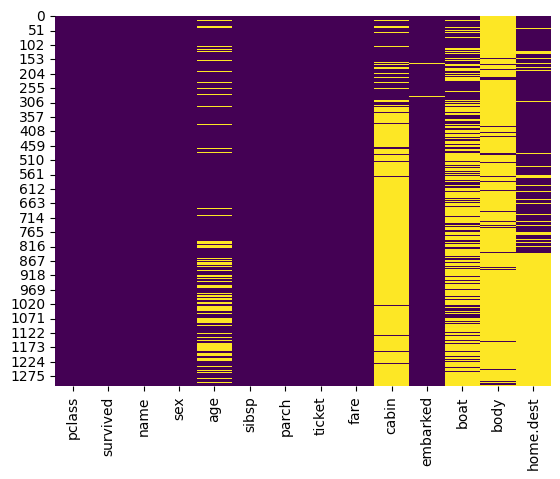

In [65]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'viridis')
plt.show()

In [50]:
df.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [14]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Using Simple Imputer to fill the missing values

In [15]:
df.select_dtypes(include = 'float64').columns

Index(['age', 'fare', 'body'], dtype='object')

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
si = SimpleImputer(strategy = "mean")
newdf = si.fit_transform(df[['age', 'fare']])
ndf = pd.DataFrame(newdf, columns = ['age', 'fare'])
ndf.head()

# Some of the age values are less than 1
# because many infants were traveling on the Titanic.

,age,fare
0,29.00,211.3375
1,0.92,151.5500
2,2.00,151.5500
3,30.00,151.5500
4,25.00,151.5500


In [18]:
ndf.isnull().sum()

,0
age,0
fare,0


In [19]:
print(df['age'].mean())
print(df['fare'].mean())

29.881137667304014
33.29547928134557


# Encoding the categorical columns

In [20]:
encoding = df['sex']
encoding.head()

,sex
0,female
1,male
2,female
3,male
4,female


# OneHotEncoding

In [21]:
pd.get_dummies(encoding).head()

,female,male
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


In [22]:
encoding = pd.DataFrame(encoding)

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder()
oe = ohe.fit_transform(encoding).toarray()

In [25]:
oe1 = pd.DataFrame(oe, columns = ['female', 'male']).astype('int64')
oe1.head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


# LabelEncoding

In [26]:
data = pd.DataFrame(df, columns = ['name'])
data.head()

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
data['Encoded_name'] = le.fit_transform(data['name'])
data.head(10)

,name,Encoded_name
0,"Allen, Miss. Elisabeth Walton",21
1,"Allison, Master. Hudson Trevor",23
2,"Allison, Miss. Helen Loraine",24
3,"Allison, Mr. Hudson Joshua Creighton",25
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",26
5,"Anderson, Mr. Harry",30
6,"Andrews, Miss. Kornelia Theodosia",45
7,"Andrews, Mr. Thomas Jr",46
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",50
9,"Artagaveytia, Mr. Ramon",54


# OrdinalEncoder

In [29]:
df['pclass'].unique()

array([1, 2, 3])

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
df1 = pd.DataFrame(df, columns = ['pclass'])
order = [[1, 2, 3]]
oe = OrdinalEncoder(categories=order)
oe.fit(df1[['pclass']])

OrdinalEncoder(categories=[[1, 2, 3]])

In [32]:
df1['size_encoded'] = oe.transform(df1[['pclass']])
df1.head()

,pclass,size_encoded
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


# Performing other operation in a different dataset

In [23]:
uploaded = files.upload()

Saving loan_data_set.csv to loan_data_set (1).csv


In [125]:
df001 = pd.read_csv('loan_data_set.csv')

In [126]:
df001.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [127]:
df001['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [128]:
ordereddata = [['Rural', 'Semiurban', 'Urban']]

In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [130]:
oe = OrdinalEncoder(categories = ordereddata)
df001['Property_Area'] = oe.fit_transform(df001[['Property_Area']])
df001.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y


In [131]:
df001['Property_Area'].unique()

array([2., 0., 1.])

# Removing Outliers using IQR

In [132]:
df001.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


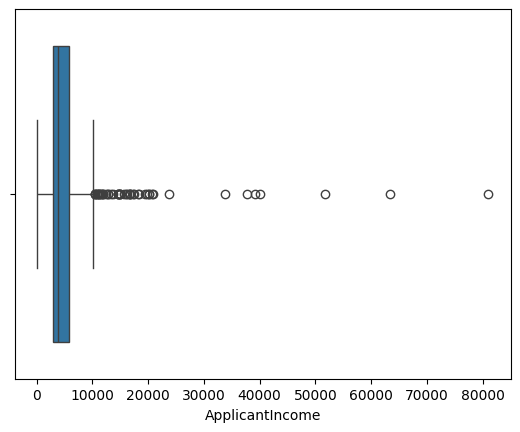

In [133]:
sns.boxplot(x = 'ApplicantIncome', data = df001)
plt.show()

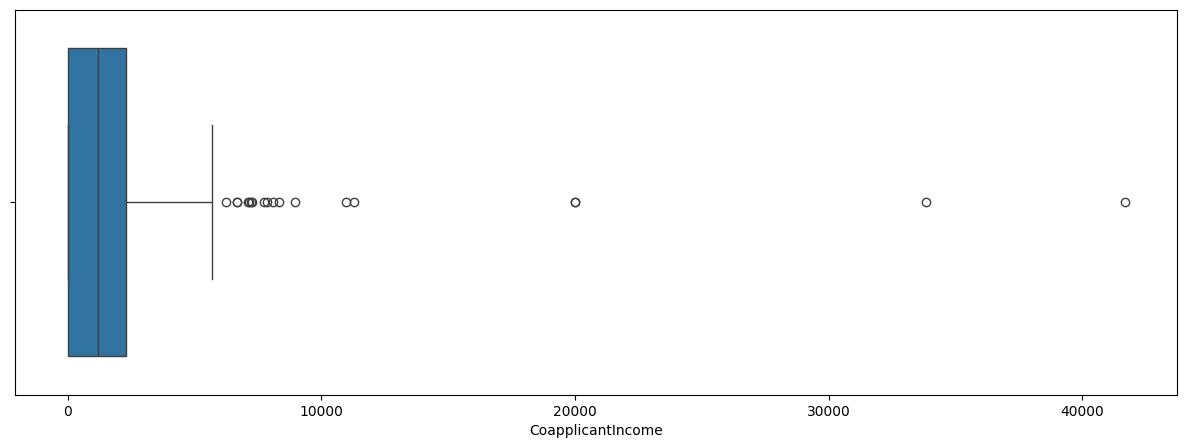

In [134]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'CoapplicantIncome', data = df001)
plt.show()

In [135]:
q1 = df001['ApplicantIncome'].quantile(0.25)
q3 = df001['ApplicantIncome'].quantile(0.75)

In [136]:
IQR = q3 - q1

In [137]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
print(min_range, max_range)

-1498.75 10171.25


In [138]:
new_df = df001[(df001['ApplicantIncome'] <= max_range) & (df001['ApplicantIncome'] >= min_range)]
new_df.shape

(564, 13)

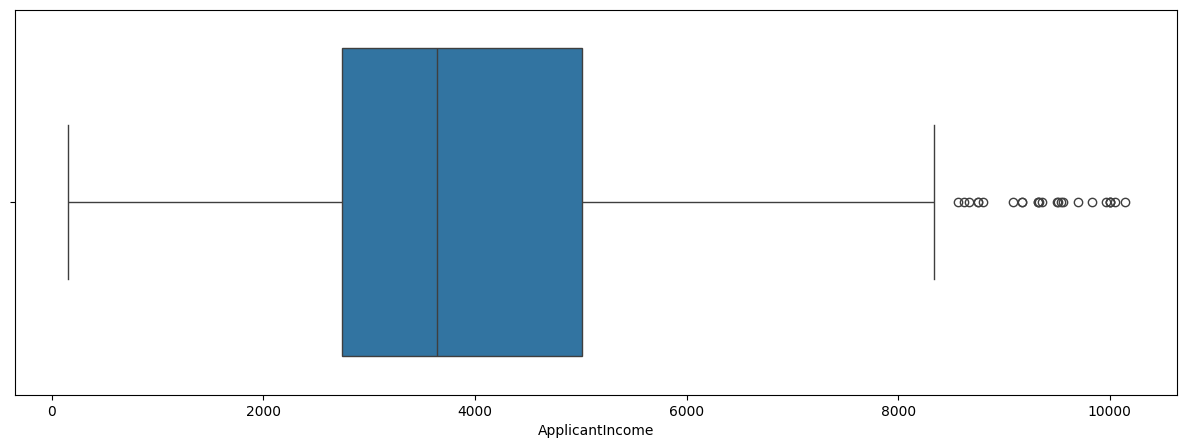

In [139]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'ApplicantIncome', data = new_df)
plt.show()

In [140]:
new_df.loc[(new_df["ApplicantIncome"] <=8300) & (new_df["ApplicantIncome"] >= 10000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [141]:
new_df.query("ApplicantIncome <= 8300").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y


# Removing outliers using z - score

In [142]:
df002 = pd.DataFrame(df001, columns = ['ApplicantIncome', 'CoapplicantIncome'])

In [143]:
minimum = df002["ApplicantIncome"].mean() - (3*df002["ApplicantIncome"].std())
maximum = df002["ApplicantIncome"].mean() + (3*df002["ApplicantIncome"].std())

In [144]:
print(minimum, maximum)

-12923.665736773899 23730.584303549145


In [145]:
newdf = df002[df002['ApplicantIncome'] <= maximum]
newdf.head()

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0


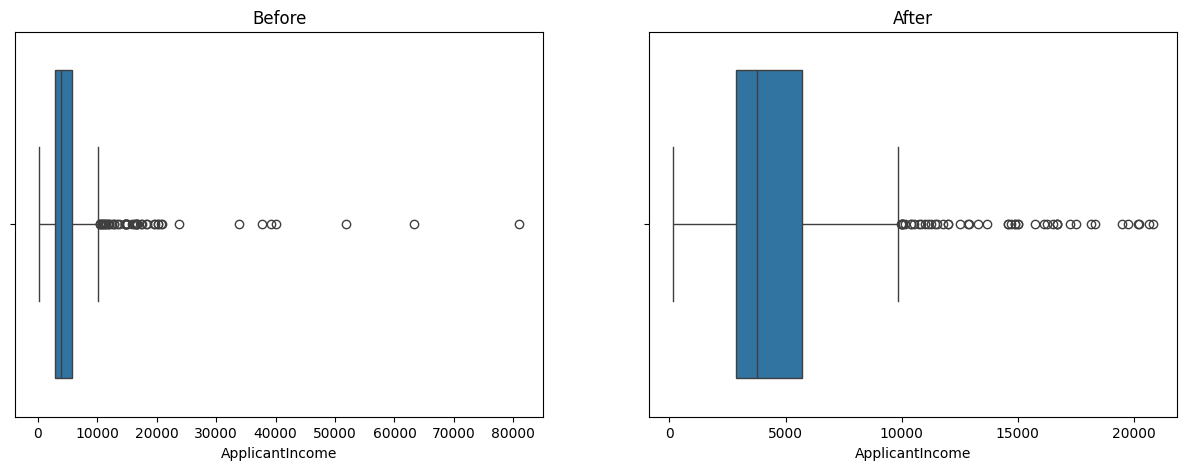

In [146]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'ApplicantIncome', data = df002)
plt.title('Before')
plt.subplot(1, 2, 2)
sns.boxplot(x = 'ApplicantIncome', data = newdf)
plt.title('After')
plt.show()

# Feature Scaling using Standardization

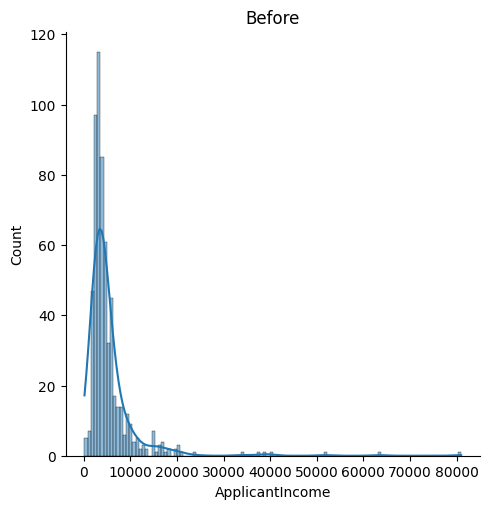

In [147]:
sns.displot(df002['ApplicantIncome'], kde = True)
plt.title('Before')
plt.show()

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
ss = StandardScaler()

In [150]:
ss.fit(df002[['ApplicantIncome']])
df002['ApplicantIncome'] = ss.transform(df002[['ApplicantIncome']])

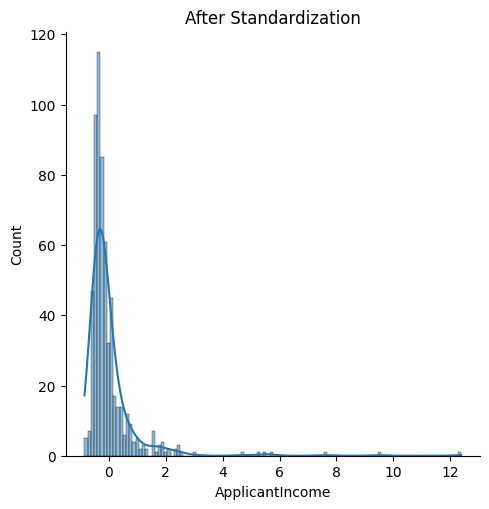

In [151]:
sns.displot(df002['ApplicantIncome'], kde = True)
plt.title('After Standardization')
plt.show()

# Feature Scaling using Normalization

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
mms = MinMaxScaler()
mms.fit(df002[["ApplicantIncome"]])
df002["ApplicantIncome"] = mms.transform(df002[["ApplicantIncome"]])

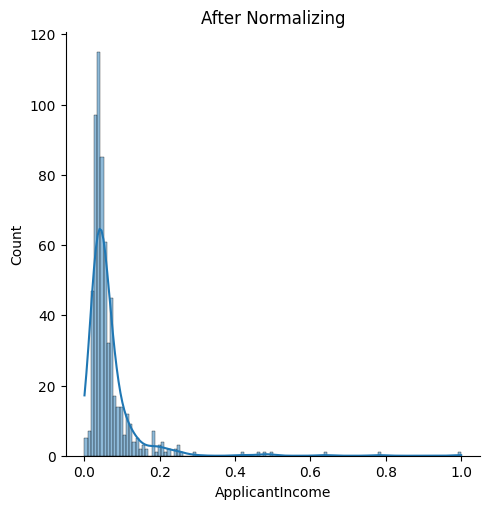

In [154]:
sns.displot(df002["ApplicantIncome"], kde = True)
plt.title("After Normalizing")
plt.show()

# After value of both Standardization and Normalization

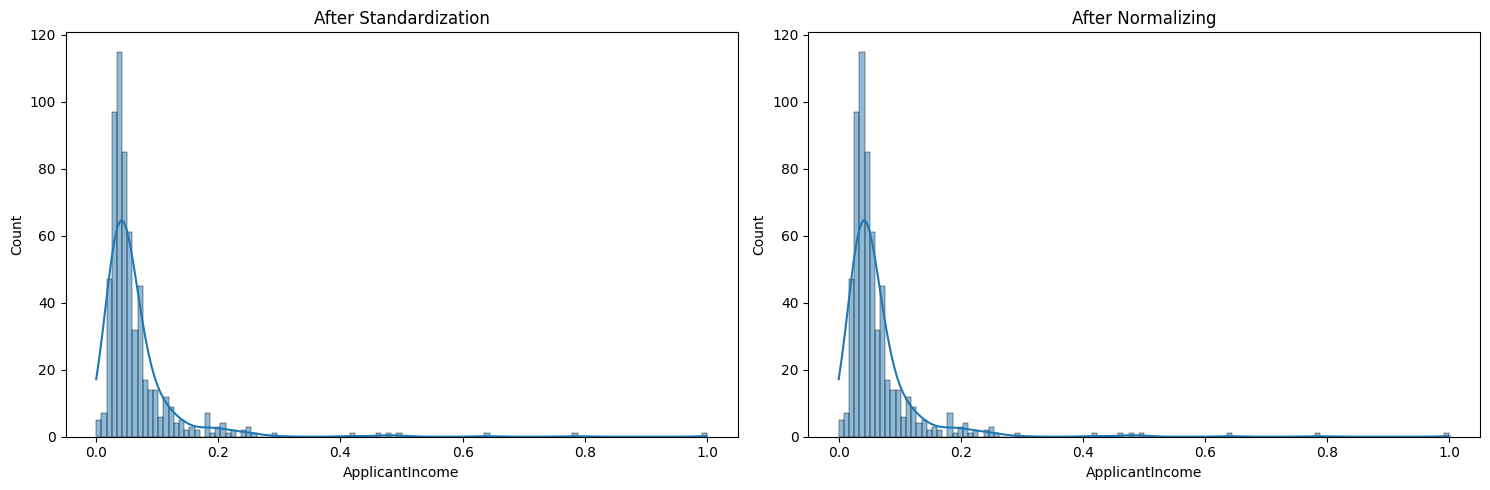

In [155]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df002['ApplicantIncome'], kde=True)
plt.title('After Standardization')

plt.subplot(1, 2, 2)
sns.histplot(df002['ApplicantIncome'], kde=True)
plt.title('After Normalizing')

plt.tight_layout()
plt.show()


# Function Transformer

In [187]:
df003 = pd.DataFrame(df001, columns = ['ApplicantIncome', 'CoapplicantIncome'])

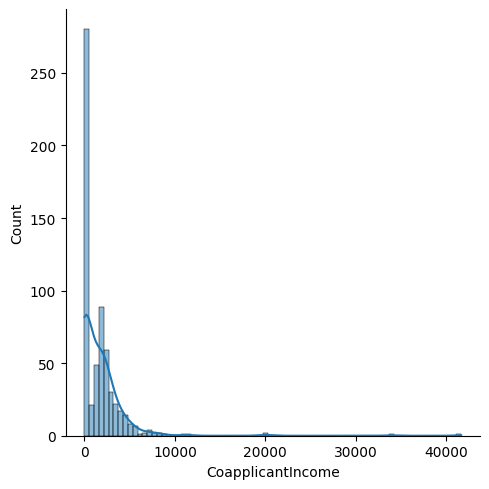

In [188]:
sns.displot(df003['CoapplicantIncome'], kde = True)
plt.show()

In [189]:
q1 = df003["CoapplicantIncome"].quantile(0.25)
q3 = df003["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1

In [190]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
print(min_range, max_range)

-3445.875 5743.125


In [191]:
df003 = df003[(df003["CoapplicantIncome"] <= max_range) & (df003["CoapplicantIncome"] >= min_range)]

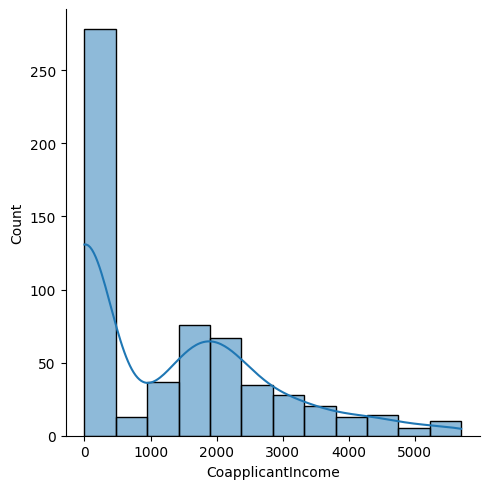

In [192]:
sns.displot(df003["CoapplicantIncome"], kde = True)
plt.show()

In [193]:
from sklearn.preprocessing import FunctionTransformer

In [194]:
ft = FunctionTransformer(func = np.log1p)

In [195]:
ft.fit(df003[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [203]:
df003['CoapplicantIncomeTransformed'] = ft.transform(df003[['CoapplicantIncome']])

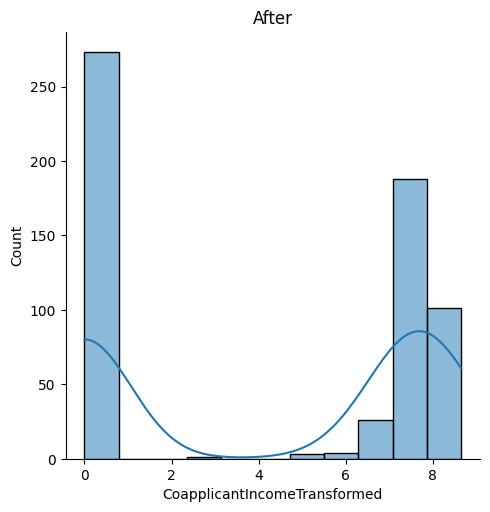

In [206]:
sns.displot(df003["CoapplicantIncomeTransformed"], kde = True)
plt.title("After")
plt.show()